In [33]:
from matplotlib import pyplot as plt

import numpy as np

from fit.mesh.mesh import Mesh
from fit.solver.solve_poisson import solve_poisson

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
## Generate mesh
n = 50
xmesh = np.linspace(0, 1, n)
ymesh = np.linspace(0, 1, n)
zmesh = np.linspace(0, 1, 2)
msh = Mesh(xmesh, ymesh, zmesh)

In [35]:
## Set boundary conditions
bc = np.full(msh.np, np.nan)
idx_bc_1 = msh.idx(0, np.arange(n), 0)
idx_bc_2 = msh.idx(9, np.arange(n), 0)
bc[idx_bc_1] = 0
bc[idx_bc_2] = 1

In [36]:
## Solve system
eps = 8.854e-12
phi = solve_poisson(msh, np.zeros(msh.np), eps, bc)

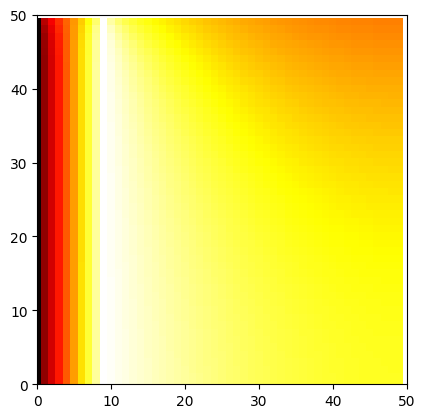

In [40]:
## Plot solution
phi_plot = np.reshape(phi, (msh.nz, msh.ny, msh.nx))
plt.imshow(phi_plot[0,:,:], cmap='hot')
plt.xlim([0, n])
plt.ylim([0, n])
plt.show()